# Customer segmentation

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("dataset.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Exploración de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


No null values appeared.

In [4]:
df["Age"].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [5]:
bins = [18,30,50,65,100]
cats = pd.cut(df["Age"].values, bins)
df["Age"]=cats
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,"(18, 30]",15,39
1,2,Male,"(18, 30]",15,81
2,3,Female,"(18, 30]",16,6
3,4,Female,"(18, 30]",16,77
4,5,Female,"(30, 50]",17,40


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

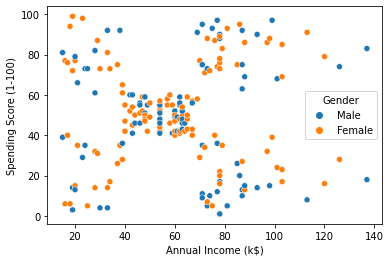

In [8]:
sns.scatterplot(df["Annual Income (k$)"], df["Spending Score (1-100)"], hue=df["Gender"])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

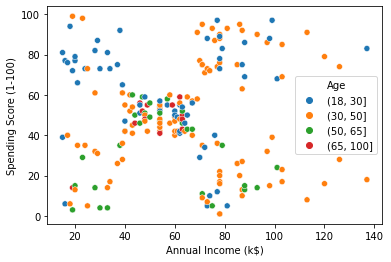

In [9]:
sns.scatterplot(df["Annual Income (k$)"], df["Spending Score (1-100)"], hue=df["Age"])

I am going to do the segmentation taking into account only the columns "Annual Income (k$)" and "Spending Score (1-100)", since they are the ones that give me a clearer segmentation.

In [10]:
X = df.iloc[:, [3,4]].values

In [11]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Clustering

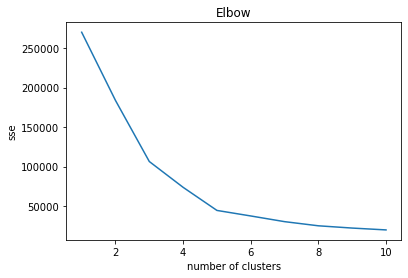

In [12]:
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,11), sse)
plt.title("Elbow")
plt.xlabel("number of clusters")
plt.ylabel("sse")
plt.show()

In [14]:
n_clusters = 5
model = KMeans(n_clusters=n_clusters, init="k-means++", random_state=12)
pred = model.fit_predict(X)

In [15]:
pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

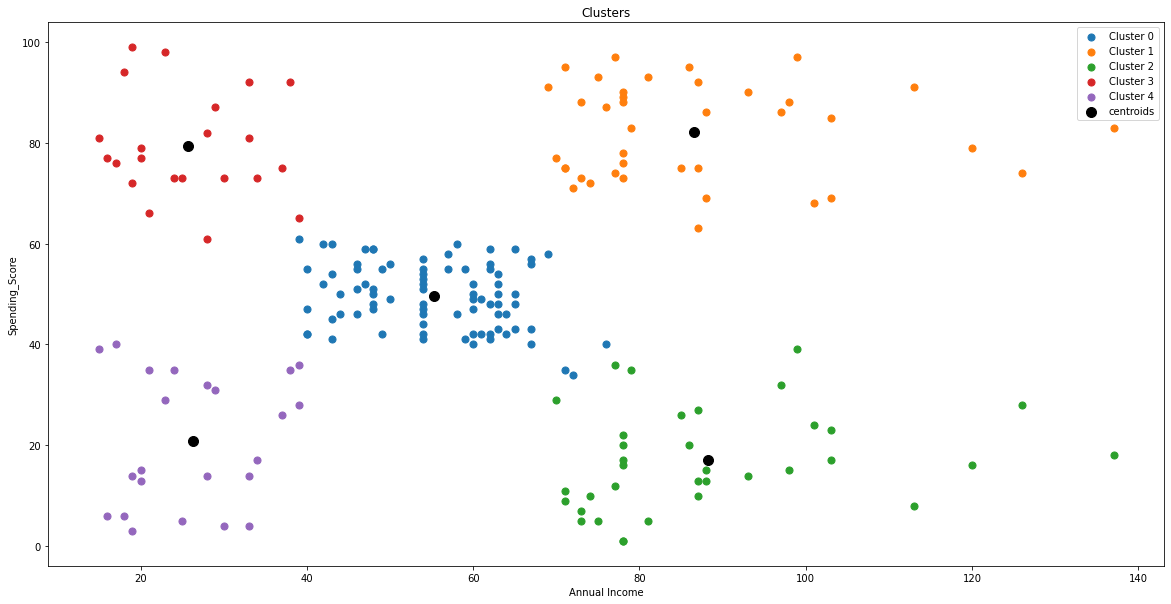

In [16]:
plt.figure(figsize=(20,10))
for i in range(0, n_clusters):
    plt.scatter(X[pred == i, 0], X[pred == i, 1], s=50, label="Cluster %d" % i)
    
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s = 100, c = 'black', label='centroids')
plt.title("Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending_Score")
plt.legend()
plt.show()

### Best customers

In [17]:
for row in X[pred == 1]:
    print(df[(df.iloc[:, 3] == row[0]) & (df.iloc[:,4] == row[1])]['CustomerID'].values)

[124]
[126]
[128]
[130 132]
[130 132]
[134]
[136]
[138]
[140]
[142]
[144]
[146]
[148]
[150]
[152]
[154]
[156]
[158]
[160]
[162]
[164]
[166]
[168]
[170]
[172]
[174]
[176]
[178]
[180]
[182]
[184]
[186]
[188]
[190]
[192]
[194]
[196]
[198]
[200]


The above IDs are those corresponding to the customers with the highest "Annual Income" and "Spending_Score".